In [1]:
"""
Progetto MLOps: Sentiment Analysis for Firm Monitoring Online
Autore: Flavio Rubens Ottaviani
Repository: https://github.com/Luffyconqueredhaki/Sentiment-analysis-for-firm-monitoring-online
Modello: cardiffnlp/twitter-roberta-base-sentiment-latest
"""

'\nProgetto MLOps: Sentiment Analysis for Firm Monitoring Online\nAutore: Flavio Rubens Ottaviani\nRepository: https://github.com/Luffyconqueredhaki/Sentiment-analysis-for-firm-monitoring-online\nModello: cardiffnlp/twitter-roberta-base-sentiment-latest\n'

In [2]:
# Installazione dipendenze
!pip install -q transformers scipy matplotlib pandas huggingface-hub

# Import librerie
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from transformers import AutoModelForSequenceClassification, AutoTokenizer, AutoConfig, pipeline
from scipy.special import softmax
import torch


In [3]:
# Funzione per preprocessare il testo
def preprocess(text):
    new_text = []
    for t in text.split(" "):
        t = '@user' if t.startswith('@') and len(t) > 1 else t
        t = 'http' if t.startswith('http') else t
        new_text.append(t)
    return " ".join(new_text)


In [4]:
# Caricamento del modello pre-addestrato
MODEL = "cardiffnlp/twitter-roberta-base-sentiment-latest"

tokenizer = AutoTokenizer.from_pretrained(MODEL, token=False)
config = AutoConfig.from_pretrained(MODEL, token=False)
model = AutoModelForSequenceClassification.from_pretrained(MODEL, token=False)

# Creo la pipeline per l'analisi del sentiment
sentiment_pipeline = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

# Verifico disponibilita GPU
if torch.cuda.is_available():
    print("GPU disponibile")

# Test su testi di esempio
test_texts = [
    "I hate work with powerpoint!",
    "My car with electronics tuning get 30 HP, is very great to drive, now!",
    "Gullo is a great king",
    "Tomorrow will be great weather"
]

print("Test analisi sentiment:")
for text in test_texts:
    text_clean = preprocess(text)
    result = sentiment_pipeline(text_clean)
    print(f"Testo: {text}")
    print(f"Risultato: {result}\n")


config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cuda:0


model.safetensors:   0%|          | 0.00/501M [00:00<?, ?B/s]

GPU disponibile
Test analisi sentiment:
Testo: I hate work with powerpoint!
Risultato: [{'label': 'negative', 'score': 0.9265144467353821}]

Testo: My car with electronics tuning get 30 HP, is very great to drive, now!
Risultato: [{'label': 'positive', 'score': 0.9756821990013123}]

Testo: Gullo is a great king
Risultato: [{'label': 'positive', 'score': 0.9333028197288513}]

Testo: Tomorrow will be great weather
Risultato: [{'label': 'positive', 'score': 0.9874511957168579}]



In [5]:
# Dataset aziendale MachineInnovators Inc.
company_data = {
    "tweet": [
        "MachineInnovators Inc. is the best company ever!",
        "I'm not happy with MachineInnovators service.",
        "Neutral statement about MachineInnovators Inc.",
        "Amazing product launch by MachineInnovators Inc.",
        "This is the worst experience with MachineInnovators.",
        "I think MachineInnovators Inc. is doing fine."
    ]
}

df = pd.DataFrame(company_data)

# Analisi sentiment per ogni tweet
sentiments = []
for tweet in df['tweet']:
    tweet_clean = preprocess(tweet)
    result = sentiment_pipeline(tweet_clean)[0]
    sentiments.append(result['label'])

df['sentiment'] = sentiments

# Visualizzo i risultati
print("Risultati analisi aziendale:")
print(df)

Risultati analisi aziendale:
                                               tweet sentiment
0   MachineInnovators Inc. is the best company ever!  positive
1      I'm not happy with MachineInnovators service.  negative
2     Neutral statement about MachineInnovators Inc.   neutral
3   Amazing product launch by MachineInnovators Inc.  positive
4  This is the worst experience with MachineInnov...  negative
5      I think MachineInnovators Inc. is doing fine.  positive


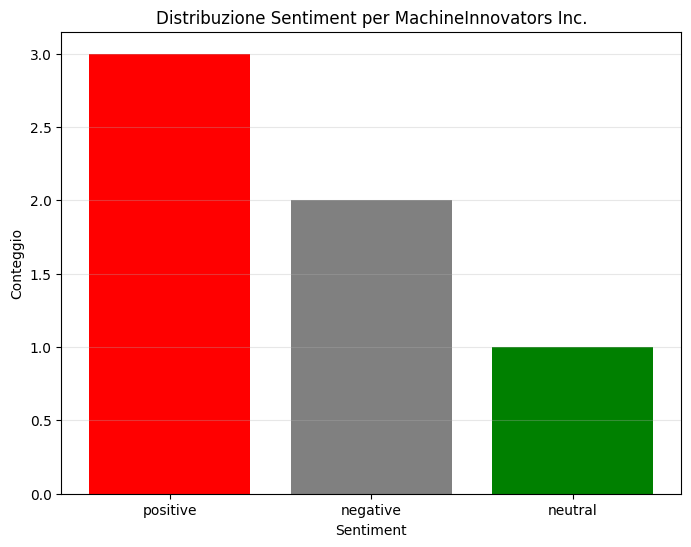

Modello salvato in ./model


In [6]:
# Calcolo la distribuzione dei sentiment
sentiment_counts = df['sentiment'].value_counts()

# Creo il grafico
plt.figure(figsize=(8, 6))
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['red', 'gray', 'green'])
plt.title('Distribuzione Sentiment per MachineInnovators Inc.')
plt.xlabel('Sentiment')
plt.ylabel('Conteggio')
plt.grid(axis='y', alpha=0.3)
plt.show()

# Salvo il modello localmente
model.save_pretrained("./model")
tokenizer.save_pretrained("./model")
print("Modello salvato in ./model")


In [8]:
# Upload su Hugging Face Hub
from huggingface_hub import notebook_login, HfApi

notebook_login()

api = HfApi()
REPO_ID = "INSERIRE REPOURL"

api.upload_folder(
    folder_path="./model",
    path_in_repo=".",
    repo_id=REPO_ID,
    repo_type="model",
    commit_message="Deploy modello sentiment per firm monitoring"
)

print(f"Modello caricato su: https://huggingface.co/{REPO_ID}")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


RepositoryNotFoundError: 401 Client Error. (Request ID: Root=1-68fcc2ca-573e508644c916f9335f5c0b;6c31d984-4e1c-413b-8623-1d2d5fb98cd2)

Repository Not Found for url: https://huggingface.co/api/models/REPO/preupload/main.
Please make sure you specified the correct `repo_id` and `repo_type`.
If you are trying to access a private or gated repo, make sure you are authenticated. For more details, see https://huggingface.co/docs/huggingface_hub/authentication
Invalid username or password.
Note: Creating a commit assumes that the repo already exists on the Huggingface Hub. Please use `create_repo` if it's not the case.